# Pycea plotting functions

Pycea implements an intuitive plotting language where complex plots can be built from simple components:

* {func}`pycea.pl.branches` plots the branches of a tree
* {func}`pycea.pl.nodes` plots the nodes of a tree
* {func}`pycea.pl.annotation` plots leaf annotations associated with a tree

In this tutorial, we will use C. elegans data from [Packer, et al. 2019](https://www.science.org/doi/10.1126/science.aax1971) to demonstrate the features of these functions and how they can be combined. This dataset contains the C. elegans lineage tree up to 400 minutes post fertilization, roughly corresponding to the Coma stage, as well as transcriptomic data from scRNA-seq aligned to the tree and spatial coordinates from live cell imaging.

In [1]:
import pycea as py
import scanpy as sc
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5, 5)

%load_ext autoreload
%autoreload 2

The C. elegans data can be easily loaded using {func}`pycea.datasets.packer19()`. For this tutorial, we will subset the tree to only include lineages where transcriptomic data is available.

In [ ]:
tdata = py.datasets.packer19(tree="observed")
tdata

TreeData object with n_obs × n_vars = 988 × 20222
    obs: 'birth_time', 'dies', 'annotation_name', 'clade', 'generation_within_clade', 'parent_cell', 'lineage_group', 'umap_cluster', 'cells_produced', 'x', 'y', 'z', 'time', 'tree'
    var: 'gene_id'
    uns: 'clade_colors', 'lineage_group_colors', 'clade_markers', 'pca', 'pca_distances', 'umap_cluster_colors', 'neighbors', 'umap', 'cells_produced_colors'
    obsm: 'spatial', 'pca', 'umap'
    varm: 'pca'
    obsp: 'pca_distances', 'distances', 'connectivities'
    obst: 'tree'

## Plotting branches

The first step is rendering the branches of the tree using {func}`pycea.pl.branches`. The `depth_key` parameter specifies the node attribute where the depth is stored. Here we with use `depth = 'time'` which contains precise division times from live cell imaging.

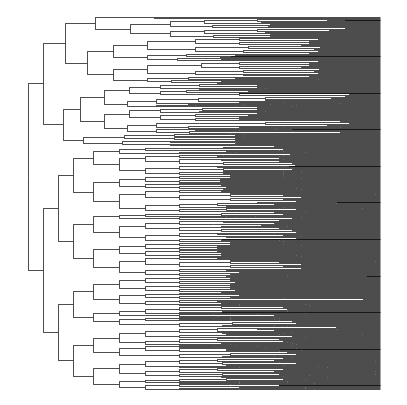

In [3]:
py.pl.branches(tdata, depth_key="time");

The way branches are plotted is highly customizable. For example, we can specify `angled_branches` with `polar` coordinates and then `color` the branches by clade.

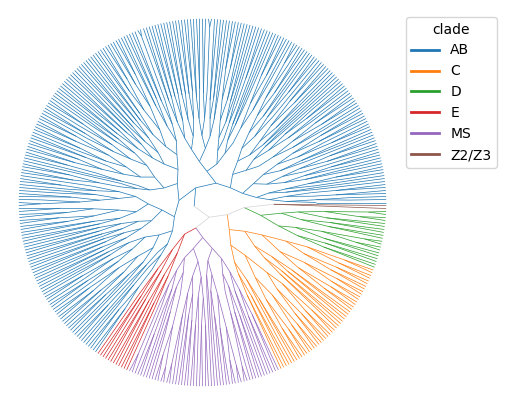

In [85]:
py.pl.branches(tdata, depth_key="time", angled_branches=True, polar=True, color="clade");

## Plotting nodes

Once branches are plotted, we can render the nodes of the tree using {func}`pycea.pl.nodes`. Similar to the branches, we can use the `color` parameter to specify how the nodes should be colored. The `slot` parameter specifies which field of the `tdata` object contains the color information.

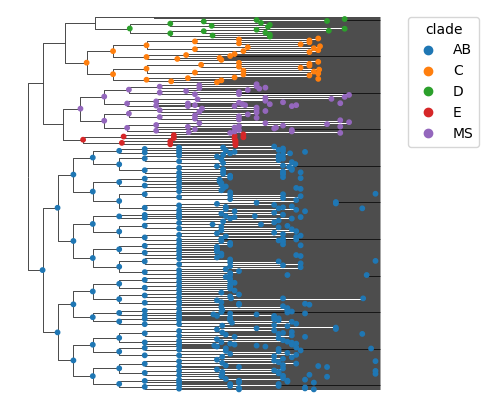

In [ ]:
py.pl.branches(tdata, depth_key="time")
py.pl.nodes(tdata, color="clade", slot="obst");

The `style` and `size` of nodes can also be specified. For example, we can use `style` to indicate the clade, `size` to indicate the time, and `color` to indicate the lineage_group annotation. Conveniently, the legends are automatically placed and can be customized using the `legend_kwargs` parameter.

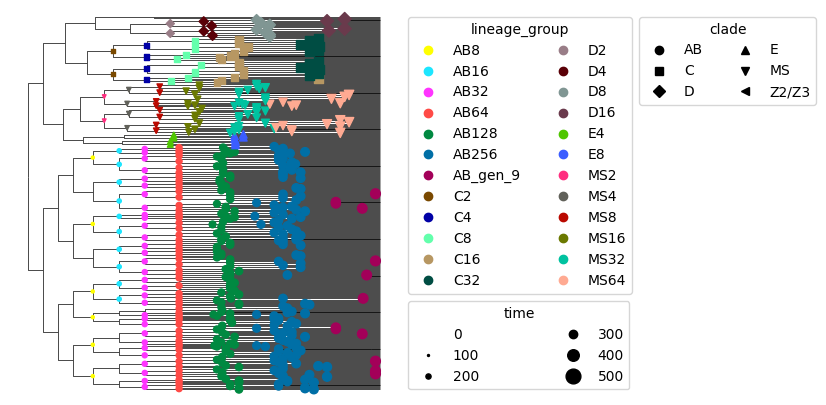

In [101]:
py.pl.branches(tdata, depth_key="time")
py.pl.nodes(tdata, color="lineage_group", size="time", style="clade", legend=True, legend_kwargs={"ncols": 2});

Since internal nodes are observed in the C. elegans dataset, we can also `color` nodes by the expression of genes such as elt-2, which is a transcription factor expressed in the E (Endoderm) lineage. We'll set `nodes = 'all'` to plot both the leaf and internal nodes.

{func}`pycea.pl.nodes` can be called multiple times to plot different sets of nodes. For example, we can mark the E progenitor cell wth a red star.

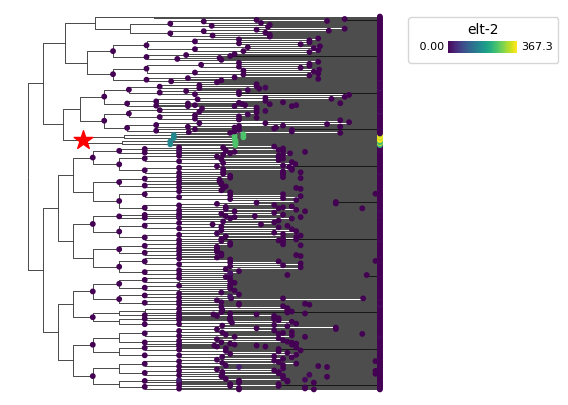

In [102]:
py.pl.branches(tdata, depth_key="time")
py.pl.nodes(tdata, color="elt-2", nodes="all")
py.pl.nodes(tdata, color="red", nodes="E", style="*", size=200);

## Plotting annotations

We can also add leaf annotations to the plot using {func}`pycea.pl.annotation`. Again we will plot the clades but this time a leaf annotation.

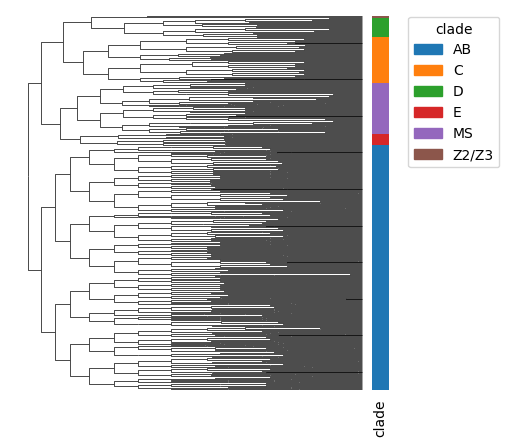

In [103]:
py.pl.branches(tdata, depth_key="time")
py.pl.annotation(tdata, keys="clade");

Annotation `keys` can be any observation attribute in the `tdata` object and multiple `keys` can be specified. For example, we can plot the expression of pie-1, hlh-1, elt-2, and unc-101 in the leaves of the tree. 

We'll set `width = .1` to make the annotations wider. The `width` parameter specifies the width the annotation relative to the width of the tree.

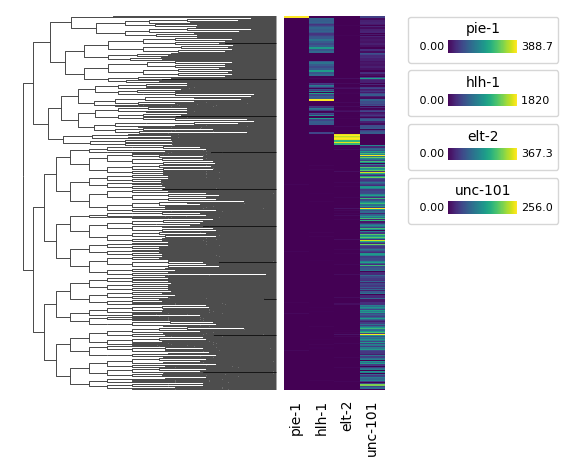

In [104]:
py.pl.branches(tdata, depth_key="time")
py.pl.annotation(tdata, keys=["pie-1", "hlh-1", "elt-2", "unc-101"], width=0.1);

Matrices stored in `obsm` and `obsp` can also be plotted as annotations. To see how lineage distance relates to transcriptomic distance, we can plot the transcriptomic distance between pairs of cells (PCA space). Clearly, the E clade is transcriptionally distinct from the other clades.

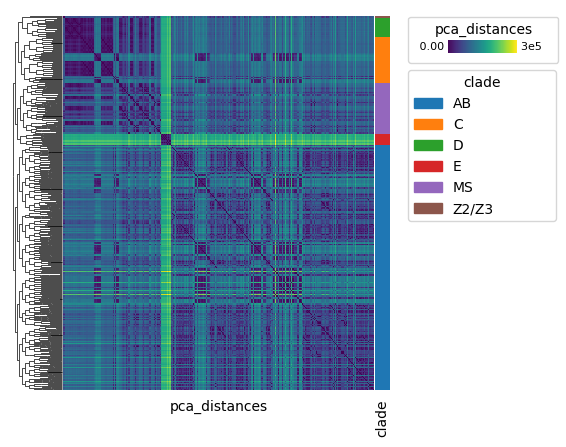

In [105]:
sc.pp.pca(tdata, n_comps=10, key_added="pca")
py.tl.distance(tdata, key="pca")
py.pl.branches(tdata, depth_key="time")
py.pl.annotation(tdata, keys=["pca_distances"], legend=True)
py.pl.annotation(tdata, keys=["clade"], legend=True, width=0.3);

## Putting it all together

Of course, all three of these functions can be layered together. Here we'll plot branches colored by clade and then annotate nodes and leaves with the umap_cluster label.

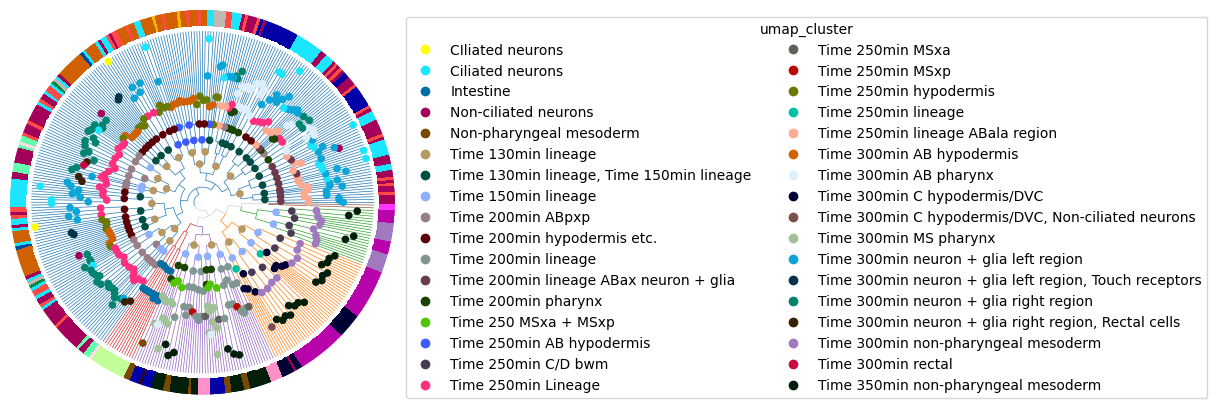

In [106]:
py.pl.branches(tdata, depth_key="time", polar=True, color="clade", legend=False, legend_kwargs={"ncols": 2})
py.pl.nodes(tdata, color="umap_cluster", size=20, legend=True, legend_kwargs={"ncols": 2})
py.pl.annotation(tdata, keys=["umap_cluster"], width=0.1, legend=False);

For convenience, Pycea also implements {func}`pycea.pl.tree` which combines these functions. {func}`pycea.pl.tree` is useful for quickly visualizing a tree, but does not provide the same flexibility as plotting components individually.

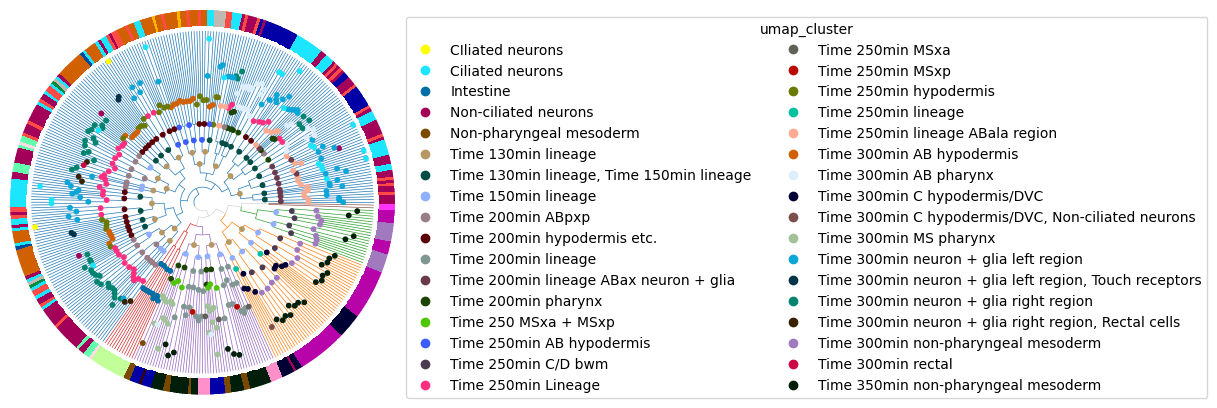

In [108]:
py.pl.tree(
    tdata,
    depth_key="time",
    polar=True,
    branch_color="clade",
    branch_legend=False,
    node_color="umap_cluster",
    node_legend=True,
    keys="umap_cluster",
    annotation_width=0.1,
    legend_kwargs={"ncols": 2},
);

## Learning more

Checkout [Customizing Scanpy plots](https://scanpy.readthedocs.io/en/stable/tutorials/plotting/advanced.html) for more information on customizing plots. Scanpy and Pycea both use the [Matplotlib](https://matplotlib.org/) plotting library so plots can be customized in a similar way.

If you have any questions or feedback, please reach out by submitting an [issue](https://github.com/YosefLab/pycea/issues) on GitHub.